# Import Library & Data Analysis


In [1]:
# connecting google drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from scipy import stats
import matplotlib.pyplot as plt

In [249]:
df_borrower = pd.read_csv('drive/My Drive/DS-course2 - Dr. Xuan Ha/w4/borrower_data.csv')
df_borrower.sample(5)

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
2088,407027,1,NaN,NaN,3900,0.83,456,591,1,27200,26,5
93159,920957,0,1.0,0.0,2000,0.62,2862,1365,1,60900,60,1
21311,143466,0,1.0,1.0,2300,0.77,2073,2424,0,0,53,5
18355,34374,0,1.0,0.0,4900,0.70,5334,2443,1,33300,41,4
61300,616773,0,1.0,0.0,5800,0.85,692,4225,1,43200,57,8


In [250]:
df_loan = pd.read_csv('drive/My Drive/DS-course2 - Dr. Xuan Ha/w4/loan_data.csv')
df_loan.sample(10)

,loan_id,loan_purpose,date,loan_granted,loan_repaid
3955,698235,home,2012-05-31,1,1.0
30890,772342,business,2012-07-19,0,NaN
40202,512882,business,2012-05-02,0,NaN
69620,664347,home,2012-08-22,1,1.0
1407,725567,home,2012-07-25,0,NaN
86923,646530,investment,2012-04-27,0,NaN
73430,374635,business,2012-12-14,0,NaN
60886,150706,emergency_funds,2012-03-15,0,NaN
41313,686525,emergency_funds,2012-04-12,0,NaN
77131,998967,business,2012-01-19,0,NaN


In [75]:
df_borrower.info()
# Checking nan
print('\n > Train columns with null values:\n', df_borrower.isnull().sum())
# print('\n > Train columns with unique values:\n', df_borrower.nunique())
print('\n Unique value in loan_id: ', df_borrower['loan_id'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 12 columns):
loan_id                                            101100 non-null int64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        46153 non-null float64
currently_repaying_other_loans                     46153 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_employed                                        101100 non-null int64
yearly_salary                                      101100 non-null int64
age                                                101100 non-null int64
dependent_number                                   101100 non-null int64
dtypes: fl

In [0]:
# Generating the training df_borrower_tr
df_borrower_tr = df_borrower
# Replacing Nan values by new categorical values, ex: if currently_repaying_other_loans is null,
# I will adjust it with 2 
df_borrower_tr['currently_repaying_other_loans'] = df_borrower_tr['currently_repaying_other_loans'].fillna(2)
df_borrower_tr['fully_repaid_previous_loans'] = df_borrower_tr['fully_repaid_previous_loans'].fillna(2)
df_borrower_tr['avg_percentage_credit_card_limit_used_last_year'] = df_borrower_tr['avg_percentage_credit_card_limit_used_last_year'].fillna(0)


In [77]:
df_borrower_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 12 columns):
loan_id                                            101100 non-null int64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        101100 non-null float64
currently_repaying_other_loans                     101100 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    101100 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_employed                                        101100 non-null int64
yearly_salary                                      101100 non-null int64
age                                                101100 non-null int64
dependent_number                                   101100 non-null int64
dtypes:

In [78]:
df_loan.info()
print('\n> Train columns with null values:\n', df_loan.isnull().sum())
print('\n Unique value in loan_id: ', df_loan['loan_id'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 5 columns):
loan_id         101100 non-null int64
loan_purpose    101100 non-null object
date            101100 non-null object
loan_granted    101100 non-null int64
loan_repaid     47654 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ MB

> Train columns with null values:
 loan_id             0
loan_purpose        0
date                0
loan_granted        0
loan_repaid     53446
dtype: int64

 Unique value in loan_id:  101100


In [0]:
# Generating the training dataframe
df_loan_tr = df_loan
df_loan_tr['loan_repaid'] = df_loan_tr['loan_repaid'].fillna('not granted')

In [0]:
# using list comprehension
df_loan_tr['profit'] = [ 1 if x == 1 else (-1 if x == 0 else 0) for x in df_loan_tr['loan_repaid']]
#df_loan_tr['profit'] = np.select(
#    [(df_loan_tr['loan_granted'] == 1) & (df_loan_tr['loan_repaid'] == 0),
#     (df_loan_tr['loan_granted'] == 1) & (df_loan_tr['loan_repaid'] == 1)],
#    [-1,1], default= 0)
# np.select work well with big dataframe evironment

In [254]:
df_loan_tr.groupby(['loan_granted', 'loan_repaid']).size().reset_index(name='Freq')

,loan_granted,loan_repaid,Freq
0,0,not granted,53446
1,1,0,16948
2,1,1,30706


In [255]:
df_loan_tr.groupby(['loan_granted', 'loan_repaid'])['profit'].sum().reset_index(name='Projit')

,loan_granted,loan_repaid,Projit
0,0,not granted,0
1,1,0,-16948
2,1,1,30706


In [256]:
df_loan_tr['moneymaking'] = [ -1 if x == 0 else 1 for x in df_loan_tr['loan_repaid']]
df_loan_tr.groupby(['moneymaking']).size().reset_index(name='Freq')

,moneymaking,Freq
0,-1,16948
1,1,84152


In [0]:
df_model = pd.merge(df_borrower_tr,df_loan_tr, how = 'inner', on ='loan_id')

In [90]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101100 entries, 0 to 101099
Data columns (total 18 columns):
loan_id                                            101100 non-null int64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        101100 non-null float64
currently_repaying_other_loans                     101100 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    101100 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_employed                                        101100 non-null int64
yearly_salary                                      101100 non-null int64
age                                                101100 non-null int64
dependent_number                                   101100 non-null int64
loan_pu

In [91]:
df_model.sample(5)

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid,profit,moneymaking
48458,518472,1,2.0,2.0,7800,0.54,1762,2315,1,11100,25,1,emergency_funds,2012-04-18,1,1,1,1
49643,632085,0,1.0,0.0,4900,0.60,2170,882,1,29100,20,5,business,2012-01-03,1,1,1,1
37040,533016,0,1.0,0.0,4300,1.01,2472,3511,1,29800,36,0,business,2012-11-15,0,not granted,0,0
20575,981042,0,1.0,1.0,3400,0.67,1191,1682,0,0,32,6,business,2012-05-07,0,not granted,0,0
70762,138988,1,2.0,2.0,9300,0.85,3551,10110,1,35300,49,1,investment,2012-07-09,1,1,1,1


# Feature Engineering

## 1.Graphical analysis
Modelling with "profit" target variable, I have to face the multiclass classification problems, unfortunally, my knowledge is not enough to solve this problems at this moment. 

Thus, I change my target into "moneymaking" feature, as I want to predict exactly whether the borrower will pay the loan or not.




In [0]:
df_train = df_model[df_model.columns.difference(['loan_id','date','profit','loan_repaid','loan_granted'])]


,age,avg_percentage_credit_card_limit_used_last_year,checking_amount,currently_repaying_other_loans,dependent_number,fully_repaid_previous_loans,is_employed,is_first_loan,moneymaking,saving_amount,total_credit_card_limit,yearly_salary
age,1.000000,-0.002836,0.000355,-0.003097,0.000862,-0.001454,0.005059,-0.002353,-0.000584,-0.005321,-0.004052,0.005412
avg_percentage_credit_card_limit_used_last_year,-0.002836,1.000000,-0.006122,0.000093,0.005154,-0.000406,-0.009516,-0.002585,-0.076825,-0.010489,0.318143,-0.011848
checking_amount,0.000355,-0.006122,1.000000,-0.062500,-0.081963,0.009189,0.244383,0.005114,0.244091,0.301041,0.240926,0.282909
currently_repaying_other_loans,-0.003097,0.000093,-0.062500,1.000000,0.018802,0.867965,-0.055670,0.928767,-0.046939,-0.063285,-0.052500,-0.065930
dependent_number,0.000862,0.005154,-0.081963,0.018802,1.000000,-0.000526,-0.060847,0.000887,-0.062818,-0.075647,-0.058650,-0.073218
fully_repaid_previous_loans,-0.001454,-0.000406,0.009189,0.867965,-0.000526,1.000000,0.001688,0.937598,0.013536,0.009899,0.005712,0.001855
is_employed,0.005059,-0.009516,0.244383,-0.055670,-0.060847,0.001688,1.000000,-0.000971,-0.126143,0.248526,0.195274,0.799051
is_first_loan,-0.002353,-0.002585,0.005114,0.928767,0.000887,0.937598,-0.000971,1.000000,0.009840,0.005650,0.000679,-0.001674
moneymaking,-0.000584,-0.076825,0.244091,-0.046939,-0.062818,0.013536,-0.126143,0.009840,1.000000,0.246620,0.137722,0.026722
saving_amount,-0.005321,-0.010489,0.301041,-0.063285,-0.075647,0.009899,0.248526,0.005650,0.246620,1.000000,0.234181,0.288712


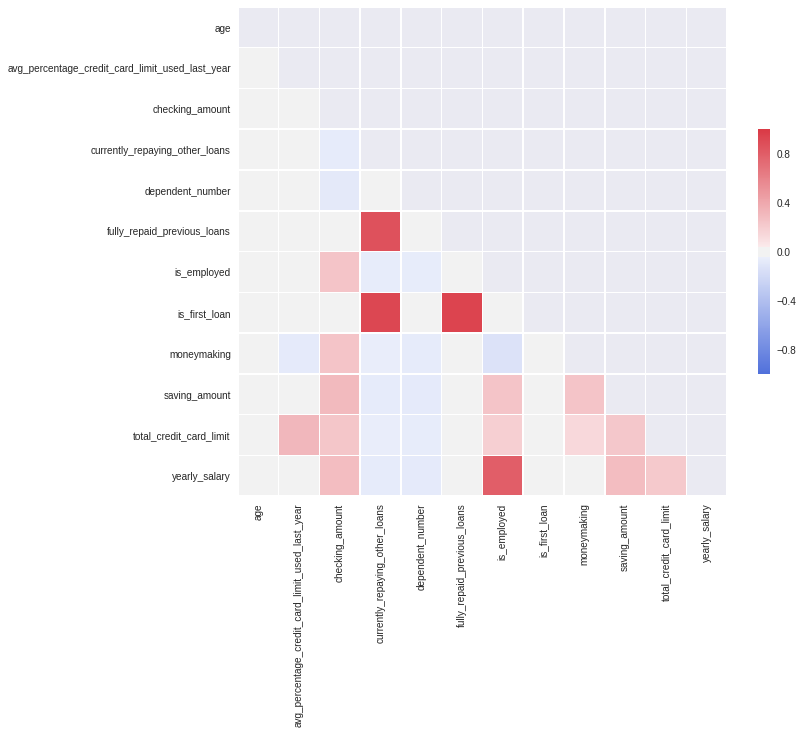

In [259]:
import matplotlib.pyplot as plt

correlations = df_train.corr()
#fig = plt.figure()
#ax = fig.add_subplot(111)
#cax = ax.matshow(correlations, vmin=-1, vmax=1)
#fig.colorbar(cax)
#names = list(df_model)
#ax.set_xticklabels(names)
#ax.set_yticklabels(names)
#plt.show()

# Using seaborn package
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmin = -1, vmax= 1 , center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

correlations

In [0]:
# Use box plot with serveral continous variable

> No.outliner: 338 



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


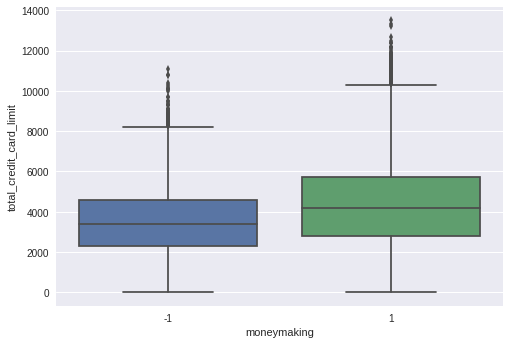

In [260]:
sns.boxplot(x="moneymaking", y="total_credit_card_limit", whis=1.6, data=df_train)
# whis defined as proportion of the IQR past the low and high quartiles to extend the plot whiskers 
# or interquartile range (IQR)
# therefore, maximum = Q3 + 1.6*IQR , min = Q1 - 1.6*IQR
Q1 = df_train['total_credit_card_limit'].quantile(0.25)
Q3 = df_train['total_credit_card_limit'].quantile(0.75)
IQR = Q3 - Q1
print('> No.outliner: %d \n' %((df_train['total_credit_card_limit'] < (Q1 - 1.6 * IQR)) | (df_train['total_credit_card_limit'] > (Q3 + 1.6 * IQR))).sum())

> No.outliner: 2217 



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


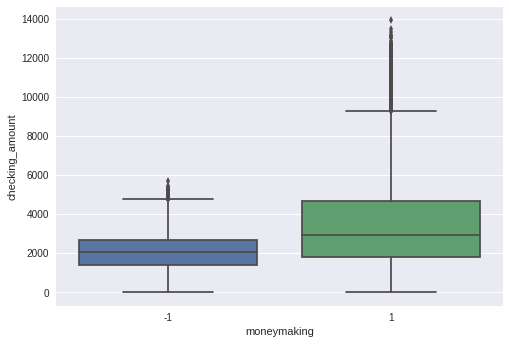

In [261]:
sns.boxplot(x="moneymaking", y="checking_amount", whis=1.6, data=df_train)
# whis defined as proportion of the IQR past the low and high quartiles to extend the plot whiskers 
# or interquartile range (IQR)
# therefore, maximum = Q3 + 1.6*IQR , min = Q1 - 1.6*IQR
Q1 = df_train['checking_amount'].quantile(0.25)
Q3 = df_train['checking_amount'].quantile(0.75)
IQR = Q3 - Q1
print('> No.outliner: %d \n' %((df_train['checking_amount'] < (Q1 - 1.6 * IQR)) | (df_train['checking_amount'] > (Q3 + 1.6 * IQR))).sum())

> No.outliner: 4275 



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


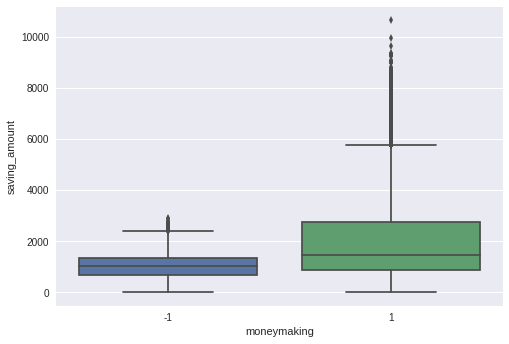

In [262]:
sns.boxplot(x="moneymaking", y="saving_amount", whis=1.6, data=df_train)
# whis defined as proportion of the IQR past the low and high quartiles to extend the plot whiskers 
# or interquartile range (IQR)
# therefore, maximum = Q3 + 1.6*IQR , min = Q1 - 1.6*IQR
Q1 = df_train['saving_amount'].quantile(0.25)
Q3 = df_train['saving_amount'].quantile(0.75)
IQR = Q3 - Q1
print('> No.outliner: %d \n' %((df_train['saving_amount'] < (Q1 - 1.6 * IQR)) | (df_train['saving_amount'] > (Q3 + 1.6 * IQR))).sum())

### Note:
  saving_amount, and checking_amount may be too skewed,  however, we cannot remove these values as the outlier, because this could contain the critical information for modelling.

> No.outliner: 3 



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


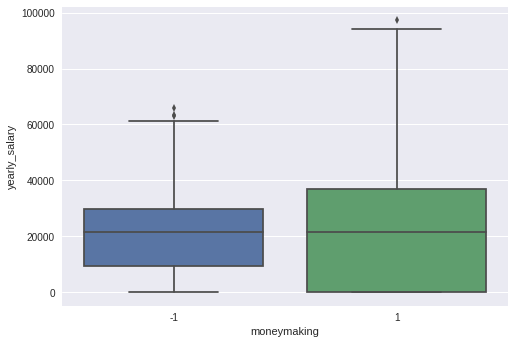

In [263]:
sns.boxplot(x="moneymaking", y="yearly_salary", whis=1.6, data=df_train)
# whis defined as proportion of the IQR past the low and high quartiles to extend the plot whiskers 
# or interquartile range (IQR)
# therefore, maximum = Q3 + 1.6*IQR , min = Q1 - 1.6*IQR
Q1 = df_train['yearly_salary'].quantile(0.25)
Q3 = df_train['yearly_salary'].quantile(0.75)
IQR = Q3 - Q1
print('> No.outliner: %d \n' %((df_train['yearly_salary'] < (Q1 - 1.6 * IQR)) | (df_train['yearly_salary'] > (Q3 + 1.6 * IQR))).sum())

> No.outliner: 90 



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


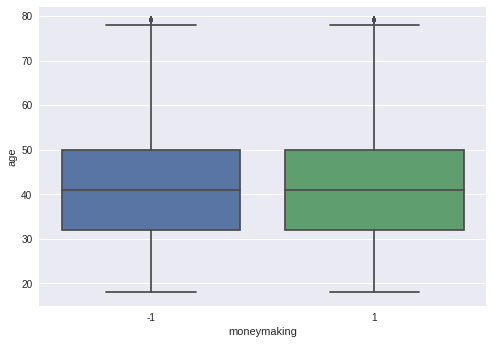

In [264]:
sns.boxplot(x="moneymaking", y="age", whis=1.6, data=df_train)
# whis defined as proportion of the IQR past the low and high quartiles to extend the plot whiskers 
# or interquartile range (IQR)
# therefore, maximum = Q3 + 1.6*IQR , min = Q1 - 1.6*IQR
Q1 = df_train['age'].quantile(0.25)
Q3 = df_train['age'].quantile(0.75)
IQR = Q3 - Q1
print('> No.outliner: %d \n' %((df_train['age'] < (Q1 - 1.6 * IQR)) | (df_train['age'] > (Q3 + 1.6 * IQR))).sum())

## 2.Important Features

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
y = df_train['moneymaking']
X = df_train.drop(['moneymaking'],axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
# Endcoding the categorical features and getting the dummies matrix
X_train=pd.get_dummies(X_train, prefix=['loan_purpose'], columns=['loan_purpose'])

In [268]:
# Build a forest and compute the feature importances
clf_forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
clf_forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Feature ranking:
1. saving_amount (0.187259)
2. checking_amount (0.180769)
3. total_credit_card_limit (0.127340)
4. avg_percentage_credit_card_limit_used_last_year (0.123178)
5. age (0.108905)
6. yearly_salary (0.102952)
7. dependent_number (0.068194)
8. is_employed (0.036917)
9. currently_repaying_other_loans (0.022157)
10. fully_repaid_previous_loans (0.010737)
11. loan_purpose_emergency_funds (0.006173)


Text(0.5,0,'Relative Importance')

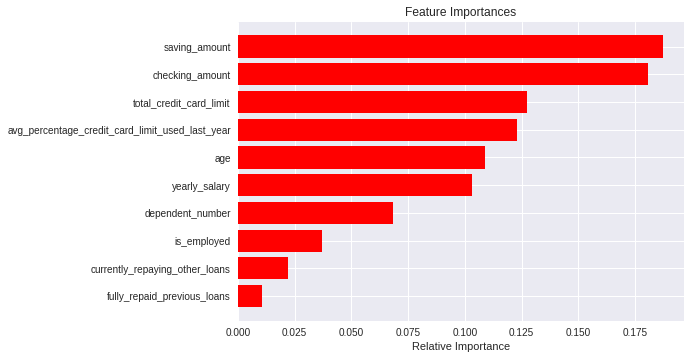

In [269]:
# std = np.std([tree.feature_importances_ for tree in clf_forest.estimators_],axis=0)
features = X_train.columns
importances = clf_forest.feature_importances_
nSelectedFeature = 11
indices = np.argsort(importances)[-(nSelectedFeature-1):]

# Print the feature ranking
rank = np.argsort(clf_forest.feature_importances_)[::-1]
print("Feature ranking:")
for f in range(nSelectedFeature):
    print("%d. %s (%f)" % (f + 1, features[rank[f]] , importances[rank[f]]))


# Bar plot
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

### Note:
  After this step, I can make decision for dropping  features namely: yearly_salary, is_first_loan, currently_repaying_other_loans. <br>
  This is because yearly_salary significantly correlates with is_employed, and the latter feature get higher importance in model.  Similar for the case of removing is_first_loan and currently_repaying_other_loans.

## 3.Feature selection

In [290]:
df_trained = df_train[df_train.columns.difference(['is_employed','is_first_loan','currently_repaying_other_loans'])]
df_trained.head()

,age,avg_percentage_credit_card_limit_used_last_year,checking_amount,dependent_number,fully_repaid_previous_loans,loan_purpose,moneymaking,saving_amount,total_credit_card_limit,yearly_salary
0,47,0.49,1073,3,2.0,business,1,3285,8000,0
1,33,1.03,5299,1,1.0,investment,1,636,4500,13500
2,38,0.82,3422,8,2.0,other,1,2085,6900,24500
3,24,0.82,3388,1,1.0,investment,1,358,1200,0
4,36,0.80,4282,1,0.0,emergency_funds,1,2138,6900,18100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


False
False
> No.outliner: 499 



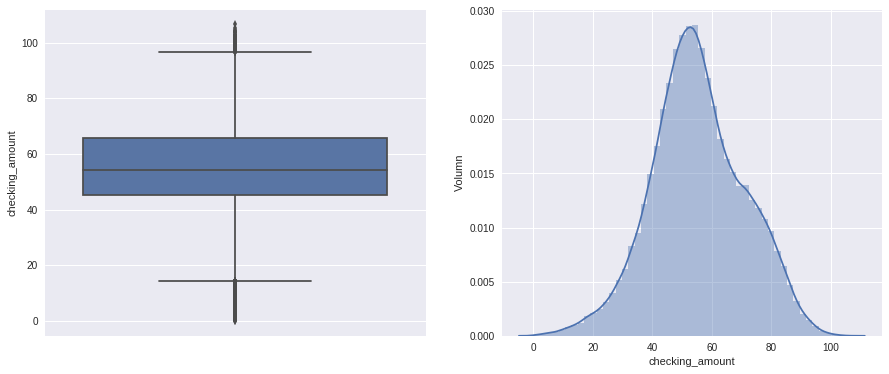

In [291]:
#I uses the boxplot transformation to reduce the skew of continous varibale
# plus 1 for eliminating zero cases
df_trained['checking_amount'], para = stats.boxcox(df_trained['checking_amount']+1)
col = df_trained['checking_amount']
print(np.isinf(col).sum()>1)
print(col.isnull().sum()>0)

Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
print('> No.outliner: %d \n' %((col < (Q1 - 1.6 * IQR)) | (col > (Q3 + 1.6 * IQR))).sum())

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=col)
fig.set_title('')
fig.set_ylabel('checking_amount')
    
plt.subplot(1, 2, 2)
fig = sns.distplot(col.dropna())#.hist(bins=20)
fig.set_ylabel('Volumn')
fig.set_xlabel('checking_amount')

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


False
False
> No.outliner: 693 



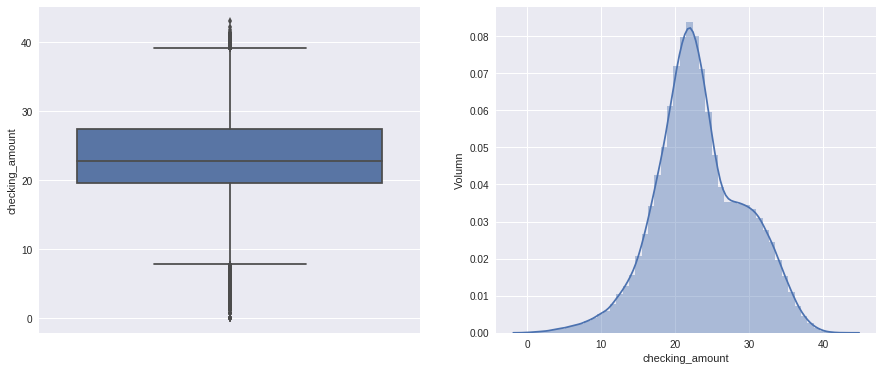

In [293]:
#I uses the boxplot transformation to reduce the skew of continous varibale
# plus 1 for eliminating zero cases
df_trained['saving_amount'], para = stats.boxcox(df_trained['saving_amount']+1)
col = df_trained['saving_amount']
print(np.isinf(col).sum()>1)
print(col.isnull().sum()>0)

Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
print('> No.outliner: %d \n' %((col < (Q1 - 1.6 * IQR)) | (col > (Q3 + 1.6 * IQR))).sum())

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=col)
fig.set_title('')
fig.set_ylabel('checking_amount')
    
plt.subplot(1, 2, 2)
fig = sns.distplot(col.dropna())#.hist(bins=20)
fig.set_ylabel('Volumn')
fig.set_xlabel('checking_amount')

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


False
False
> No.outliner: 0 



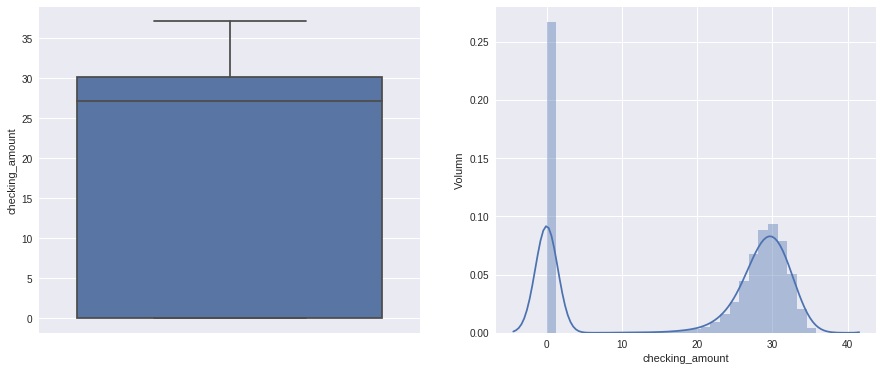

In [292]:
#I uses the boxplot transformation to reduce the skew of continous varibale
# plus 1 for eliminating zero cases
df_trained['yearly_salary'], para = stats.boxcox(df_trained['yearly_salary']+1)
col = df_trained['yearly_salary']
print(np.isinf(col).sum()>1)
print(col.isnull().sum()>0)

Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
print('> No.outliner: %d \n' %((col < (Q1 - 1.6 * IQR)) | (col > (Q3 + 1.6 * IQR))).sum())

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=col)
fig.set_title('')
fig.set_ylabel('checking_amount')
    
plt.subplot(1, 2, 2)
fig = sns.distplot(col.dropna())#.hist(bins=20)
fig.set_ylabel('Volumn')
fig.set_xlabel('checking_amount')

plt.show()

# Fitting model

## Define function

In [0]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator
class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """

    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.

        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                lambda x:
                np.argmax(np.bincount(x,
                                      weights=self.weights)),
                axis=1,
                arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

## Majority Voting

In [0]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [0]:
y = df_trained['moneymaking']
X = df_trained.drop(['moneymaking'],axis=1).copy()
X=pd.get_dummies(X, prefix=['loan_purpose'], columns=['loan_purpose'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [295]:
clf1 = LogisticRegression(penalty='l2', C=0.001, random_state=1)
clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])
clf_labels = ['Logistic regression', 'Decision tree', 'KNN']
print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
  scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc')
  print("ROC AUC: %0.2f (+/- %0.2f) [%s]"% (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.80 (+/- 0.01) [Logistic regression]
ROC AUC: 0.66 (+/- 0.00) [Decision tree]
ROC AUC: 0.66 (+/- 0.01) [KNN]


In [297]:
# Majority Rule (hard) Voting
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels += ['Majority voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]
for clf, label in zip(all_clf, clf_labels):
  scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc')
  print("ROC AUC: %0.2f (+/- %0.2f) [%s]"% (scores.mean(), scores.std(), label))

ROC AUC: 0.80 (+/- 0.01) [Logistic regression]
ROC AUC: 0.66 (+/- 0.00) [Decision tree]
ROC AUC: 0.66 (+/- 0.01) [KNN]
ROC AUC: 0.82 (+/- 0.01) [Majority voting]


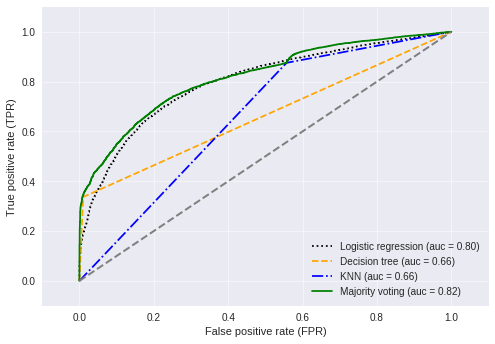

In [298]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
  # assuming the label of the positive class is 1
  y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
  roc_auc = auc(x=fpr, y=tpr)
  plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
#plt.savefig('images/04_04', dpi=300)
plt.show()

## Bagging

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=None,random_state=1)
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)

In [300]:
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train, y_train)
tree_y_train_pred = tree.predict(X_train)
tree_y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, tree_y_train_pred)
tree_test = accuracy_score(y_test, tree_y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'% (tree_train, tree_test))
print('comparing bank profitability vs your my profitability in test_set %.3f/%.3f \n'%(y_test.sum(), tree_y_test_pred.sum()))

bag = bag.fit(X_train, y_train)
bag_y_train_pred = bag.predict(X_train)
bag_y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f'% (bag_train, bag_test))
print('comparing bank profitability vs your my profitability in test_set %.3f/%.3f'%(y_test.sum(), bag_y_test_pred.sum()))

Decision tree train/test accuracies 1.000/0.812
comparing bank profitability vs your my profitability in test_set 13466.000/13136.000 

Bagging train/test accuracies 0.304/0.346
comparing bank profitability vs your my profitability in test_set 13466.000/14144.000


## Adaptive bossting

In [299]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)

tree = tree.fit(X_train, y_train)
tree_y_train_pred = tree.predict(X_train)
tree_y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'% (tree_train, tree_test))
print('comparing bank profitability vs your my profitability in test_set %.3f/%.3f \n'%(y_test.sum(), tree_y_test_pred.sum()))

ada = ada.fit(X_train, y_train)
ada_y_train_pred = ada.predict(X_train)
ada_y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f'% (ada_train, ada_test))
print('comparing bank profitability vs your my profitability in test_set %.3f/%.3f'%(y_test.sum(), ada_y_test_pred.sum()))

Decision tree train/test accuracies 0.304/0.346
comparing bank profitability vs your my profitability in test_set 13466.000/13136.000 

AdaBoost train/test accuracies 0.304/0.346
comparing bank profitability vs your my profitability in test_set 13466.000/13074.000


# Final answer:
1. As concerned in Feature Engineering section, I have built the variable to describe the model follows strategies 3 class-output: -1 lost, 0 neutral, 1 earned. However, the technique to solve this multiclass classification is over my level at this time. Therefore, I had changed to the binary problems as 


2. Using revenue-level rules above, however by my assumption, we agree that my model only lose money -1 when customers do not reload the rent amount. Thus, we will earn 1 for others case. Following the result above, I have 3 times that the profit of my model is less than the banking, however,  I also have a positive result for Bagging model, and in this case my model give a better result for customer credit rating model - 13466/14144.


3. As I mentioned in Important features section, I have the feature ranking as follows Feature ranking: 1. saving_amount (0.187259), 2. checking_amount (0.180769), 3. total_credit_card_limit (0.127340), 4. avg_percentage_credit_card_limit_used_last_year (0.123178), 5. age (0.108905), 6. yearly_salary (0.102952), 7. dependent_number (0.068194), 8. is_employed (0.036917). Hence, the most critical feature is saving amount, and "is_employed" took at 8th position over 10, however, this feature is significantly relevent with "yearly_salary" but it is less important than. 

4. It is really hard to find the effective answer for the question of adding other varibales, in my opinion, we should extend more information about the customer such as: living address, academic level or their vehicle type.